# Backpropagation Manually

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

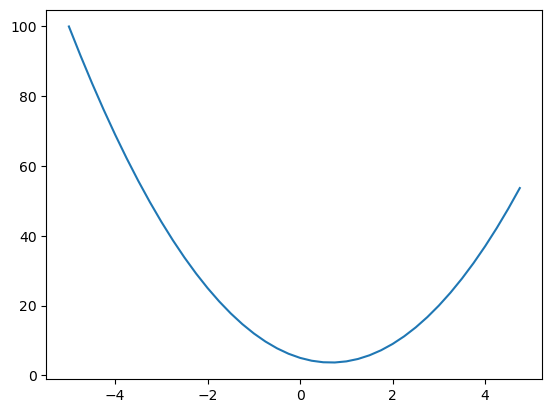

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Yes, the expression
    f(x+h)-f(x)/h 
is known as the difference quotient. It represents the average rate of change of the function ( f ) over the interval ( h ).
The derivative of ( f ) at a point ( x ) is defined as the limit of this difference quotient as ( h ) approaches 0:

When you take this limit, you're finding the instantaneous rate of change of ( f ) at the point ( x ), which is the slope of the tangent line to the curve of ( f ) at that point. If the limit exists, then ( f ) is said to be differentiable at ( x ), and the value of the limit is the derivative of ( f ) at ( x ).

In [5]:
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h #derivative definition

2.999378523327323e-06

In [6]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [7]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c 
a += h # adding a decreases the d2
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [7]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c 
c += h # adding c increases the d2
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [4]:
class Value:

    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data;
        self.grad = 0.0;
        self._prev = set(_children);
        self._op = _op;
        self.label = label;

    def __repr__(self):
        return f"Value (data={self.data})"

    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),'+')
        return out

    def __mul__(self,other):
        out = Value(self.data * other.data,(self,other),'*')
        return out
        
    def tanh(self):
        x = self.data;
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t,(self, ),'tanh')
        return out
        

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L
        

Value (data=-8.0)

In [5]:
L._prev

{Value (data=-2.0), Value (data=4.0)}

In [6]:
L._op

'*'

In [3]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s| data %.4f | grad % .4f}" % (n.label,n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

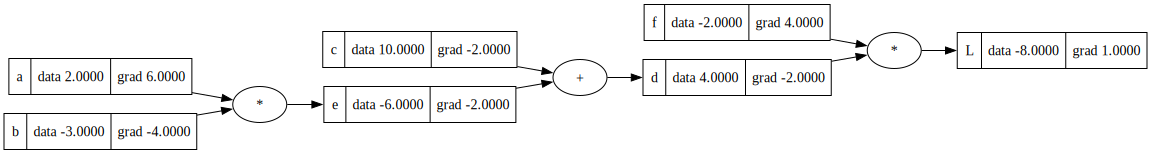

In [19]:
draw_dot(L)

In [9]:
L.grad = 1

Here "+" node which acts as d = c + e knows both the deriative (local) influence of both c and e on d.It does not know anything about the rest

In [18]:
c.grad = d.grad * 1
e.grad = -2

In [11]:
# derivative of L = d*f
# so dL/dd = f
f.grad = d.data
d.grad = f.data

In [16]:
# derivative of L with respect to b
# dL/db = dL/de *de/db
# de/db = a
b.grad = a.data * e.grad
a.grad = b.data  * e.grad


In [17]:
def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0+h, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data
  
  print((L2 - L1)/h)

# calculating deriavative of L with respect to b in above case
lol()

-3.9999999999995595


In [18]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


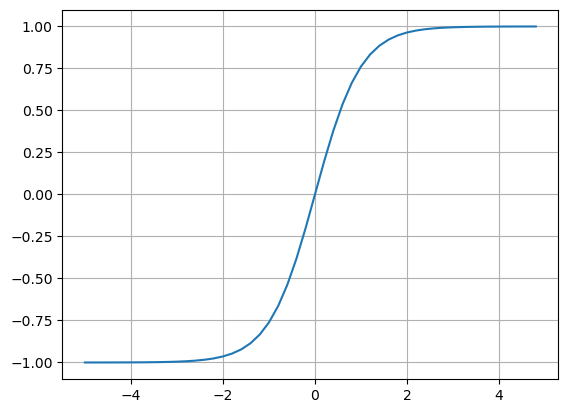

In [19]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [29]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

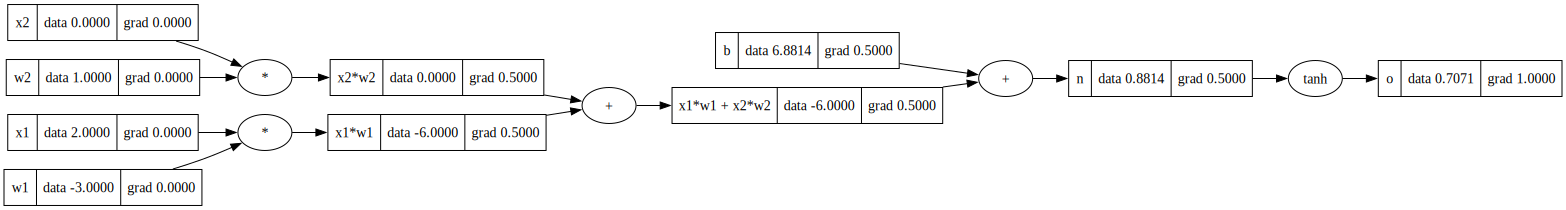

In [27]:
draw_dot(o)

In [22]:
o.grad = 1.0

In [23]:
# output = tanh(n)
# d(output)/dn = 1-tanh(n)**2 = 1-output**2

In [24]:
n.grad = 1-o.data**2

In [26]:
b.grad = 0.5
x1w1x2w2.grad = 0.5 # because + acts as distributor of the gradient
x2w2.grad = 0.5
x1w1.grad = 0.5

In [28]:
w2.grad = 0.5 * x2.data
w1.grad = 0.5 * x1.data
x2.grad = 0.5 * w2.data
x1.grad = 0.5 * w1.data

# Backpropagation 

In [4]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data;
        self.grad = 0.0;
        self._backward = lambda: None
        self._prev = set(_children);
        self._op = _op;
        self.label = label;

    def __repr__(self):
        return f"Value (data={self.data})"

    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),'+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self,other):
        out = Value(self.data * other.data,(self,other),'*')
        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward
        return out
        
    def tanh(self):
        x = self.data;
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t,(self, ),'tanh')

        def _backward():
            self.grad += (1-t**2) * out.grad
        out._backward = _backward
        return out


    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
          if v not in visited:
            visited.add(v)
            for child in v._prev:
              build_topo(child)
            topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
        

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L
        

Value (data=-8.0)

In [18]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

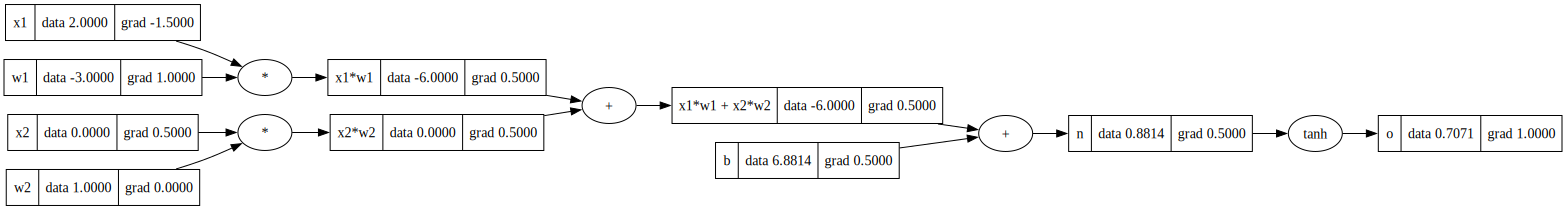

In [31]:
draw_dot(o)

In [16]:
o.backward()

In [22]:
o.grad = 1

In [23]:
o._backward()

In [25]:
n._backward()

In [27]:
b._backward()

In [28]:
x1w1x2w2._backward()

In [29]:
x2w2._backward()

In [30]:
x1w1._backward()

Topological sorting is a linear ordering of vertices in a Directed Acyclic Graph (DAG) such that for every directed edge 
u→v, vertex u appears before vertex v in the ordering.

In [7]:
o.grad = 1.0
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o) # you are only going to be on the topo after all your children are added.
topo

[Value (data=0.0),
 Value (data=1.0),
 Value (data=0.0),
 Value (data=2.0),
 Value (data=-3.0),
 Value (data=-6.0),
 Value (data=-6.0),
 Value (data=6.881373587019543),
 Value (data=0.8813735870195432),
 Value (data=0.7071067811865476)]

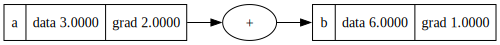

In [47]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

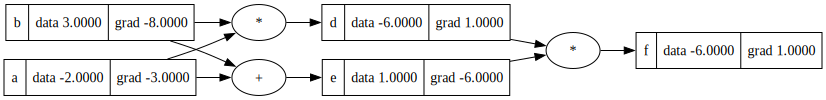

In [48]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

# Breaking up the tanh

In [10]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other) # wrap the other in value if it is just a number ( a + 1)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self(fall back)
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [141]:
a = Value(2.0)
a * 9 #a.__mul__(2)
10 * a #10.__mul__(a)

Value (data=20.0)

In [142]:
a.exp()

Value (data=7.38905609893065)

In [143]:
a = Value(2.0)
b = Value(4.0)
a-b

Value (data=-2.0)

In [156]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

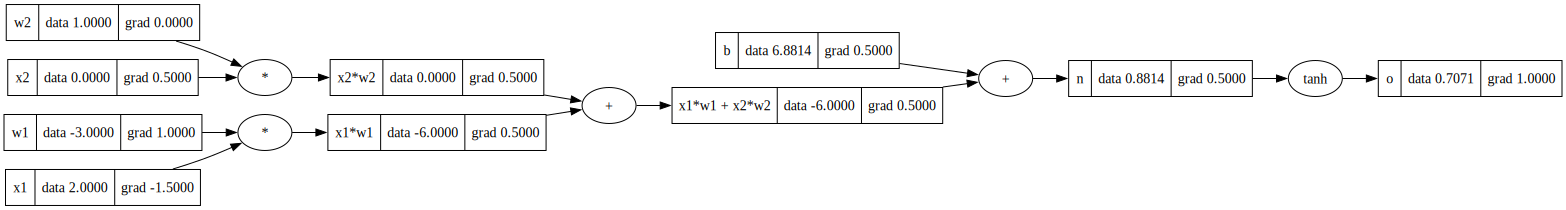

In [157]:
draw_dot(o)

In [161]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# o = n.tanh(); o.label = 'o'
e = (2*n).exp()
o = (e-1) / (e+1); o.label = "o"
o.backward()


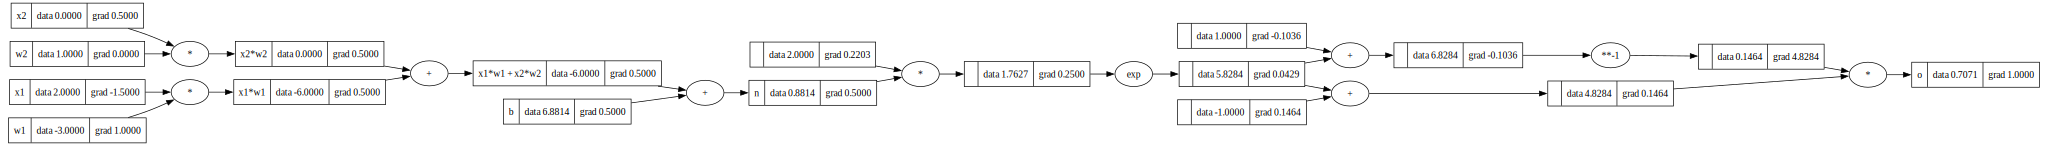

In [164]:
draw_dot(o)

# Same with PyTorch

In [1]:
import torch
import random

In [2]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item()) # item strips out the data from the tensor
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


layer = Layer(nin=3, nout=4)
It will create a layer with 4 neurons, and each neuron expects 3 inputs (nin=3).
outs = [n(x) for n in self.neurons]
Weights (self.w) and input (x) multiplication:

The input x (a list of Value objects) is multiplied element-wise with the weights of the neuron (self.w).
zip(self.w, x) pairs the weights and inputs together, and then the products of these pairs are summed up.
Add Bias (self.b):

After summing the products of weights and inputs, the bias (self.b) is added to this sum.

In [62]:
class Neuron:
  
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons] #computes n(x) to create its value
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [59]:
# x = [2.0, 3.0, -1.0]
# n = MLP(3, [4, 4, 1]) # Three inputs into two layers of 4 and one output
# n(x)

In [63]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
y_pred = [n(x) for x in xs]
y_pred

[Value(data=-0.8113780783620971),
 Value(data=-0.6315161372639289),
 Value(data=-0.8084292207228837),
 Value(data=-0.7309048360068899)]

In [46]:
n.parameters()

[Value(data=-0.8214856776223733),
 Value(data=-0.9079436303031894),
 Value(data=0.7188346379327362),
 Value(data=0.9358322272427189),
 Value(data=0.5914949878662374),
 Value(data=-0.7653117537225513),
 Value(data=0.437477098262697),
 Value(data=-0.696297865053829),
 Value(data=-0.840418127504974),
 Value(data=0.3574502938926698),
 Value(data=0.9665293097238108),
 Value(data=0.6710740938263806),
 Value(data=0.9187722094368578),
 Value(data=0.6285176042936769),
 Value(data=0.7344208041362259),
 Value(data=0.5044685077733475),
 Value(data=0.6641976684058069),
 Value(data=0.46002641318258886),
 Value(data=0.09394398287747197),
 Value(data=0.9247905743266034),
 Value(data=-0.9240236181653845),
 Value(data=-0.845211444949393),
 Value(data=-0.7533006497532375),
 Value(data=-0.15189831165754586),
 Value(data=0.4793939441218209),
 Value(data=-0.3323276315664261),
 Value(data=0.03766853347772048),
 Value(data=-0.8033005195657541),
 Value(data=0.9240110649043849),
 Value(data=0.9393067362227006),

In [64]:
loss = sum((yout-ygt)**2 for ygt, yout in zip(ys,y_pred))
loss

Value(data=6.44960181465254)

In [65]:
loss.backward()

In [66]:
n.layers[0].neurons[0].w[0].grad

-0.20773096089222925

In [67]:
n.layers[0].neurons[0].w[0].data

-0.603741796505652

In [68]:
for p in n.parameters():
    p.data -= 0.01 * p.grad

In [69]:
n.layers[0].neurons[0].w[0].data

-0.6016644868967297

In [70]:
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

0 6.153743363122546
1 4.490485249849432
2 5.529328001048672
3 4.51459862269535
4 4.806132212923572
5 4.225112638831732
6 3.928370852627615
7 3.7144958024979355
8 2.8732457022142004
9 2.72507059107984
10 0.4176020000034645
11 0.19598509225255378
12 0.14168203793513726
13 0.10956775010205955
14 0.0886024487885453
15 0.07395875913349596
16 0.06321358851322346
17 0.055027353396700396
18 0.048603713784450275
19 0.04344163829520313


In [21]:
class Neuron:
  
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) # x = [2.0,3.0], n = Neuron(2), n(x) call is called
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

  def __repr__(self):
    return f"Neuron(weights={self.weights}, bias={self.bias})"

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
    print(self.neurons)
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons] #computes n(x) to create its value
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [28]:
x = [2.0,3.0]
n = Layer(2,3)
n.parameters(),n(x)

[<__main__.Neuron object at 0x126fb69d0>, <__main__.Neuron object at 0x126fb6ad0>, <__main__.Neuron object at 0x126fb6e50>]


([Value(data=-0.6731846745040126),
  Value(data=-0.7839709521400009),
  Value(data=0.7245261136084133),
  Value(data=0.7180070663515123),
  Value(data=-0.9068895316100682),
  Value(data=-0.9375890367495903),
  Value(data=-0.37451019096904936),
  Value(data=0.22596717268617872),
  Value(data=0.44651555324442227)],
 [Value(data=-0.9947889501057863),
  Value(data=-0.9767863434821507),
  Value(data=0.35870309569623016)])